![](header.jpg)

# OpenCV Images and Color Spaces

Kevin J. Walchko

created 20 July 2017

---

We are going to start learning about image processing. To do that, we are using OpenCV, which is a standard computer vision library. We are also going to talk about color spaces and about other representations other than the classic RGB color model most people are familar with.

![](rgb-1.png)

 Although we are going to focus on OpenCV, there are other useful libraries out there:
 
 - [dlib:](http://dlib.net/) a machine learning toolbox that can help image recognition
 - [scikit-image:](http://scikit-image.org/) an image processing toolkit which is part of [SciPy](https://www.scipy.org/) or scientific python which aims to a Matlab replacement

## Objectives

- read and write images
- opencv image format
- how to convert between colorspaces
- access video streams from cameras and movies
- affine transformation

## References

- [OpenCV source code on github](https://github.com/opencv/opencv)
- [OpenCV 3.3 Docs](http://docs.opencv.org/3.3.0/)
- [OpenCV 3.3 Python Tutorials](http://docs.opencv.org/3.3.0/d6/d00/tutorial_py_root.html)
- [handee opencv tutorials](https://github.com/handee/opencv-gettingstarted)
- [Wikipedia color spaces](https://en.wikipedia.org/wiki/Color_space)
- [Wikipedia HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV)
- [List of color spaces and their uses](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses)
- [Website to understand RGB and HSV colors](http://colorizer.org/)
- [scikit-image](http://scikit-image.org/docs/dev/auto_examples/index.html)

## Setup

In [1]:
import cv2          # opencv itself
import numpy as np  # matrix manipulations
from matplotlib import pyplot as plt

import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [2]:
input_image_bgr=cv2.imread('droids.jpg')

Now python OpenCV stores an image as a `numpy` array of arrays. Basically, there is an array for red, blue, and green. However, OpenCV natively stores them in the order blue, green, and red or BGR. This was a historic decision made back when Intel created this library long ago.

![](numpy_array.png)

Each color channel has its own array with a width and height and the number of channels is called the depth. A color image has a depth of 3 while a grayscale image has a depth of 1.

We can find out various things about that image

In [3]:
print('Image size is height*width*depth:', input_image_bgr.size)

# you can also think about this as rows, columns, depth
print('Image shape is (height, width, depth):', input_image_bgr.shape)

# images are typically unsigned 8b integers ranging from 0 to 255
print(f"Image data type: {input_image_bgr.dtype}")

Image size is height*width*depth: 2420736
Image shape is (height, width, depth): (788, 1024, 3)
Image data type: uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.

## Writing an Image

`cv2.imwrite(filename, img[, params])`

OpenCV will look at the extention on the file name and save it accordingly (ex. `picture.jpg` saves as JPEG image). Different formats (i.e., PNG, JPEG, TIFF, etc) have different parameters you can pass to do cool things. On average, you don't need them, especially if you are saving to PNG or JPEG.

## Displaying an Image in Jupyter

The line above in setup (`from matplotlib import pyplot as plt`) gives us access to a lot of plotting routines. These are similar to the Matlab routines, but not exactly.

- plt.imshow(*image*): displays an image
- plt.subplot(*rows*, *columns*, *image number*): makes an array of images
- plt.title(*string*): puts a title
- plt.grid(*True or False*): turns on/off the grid

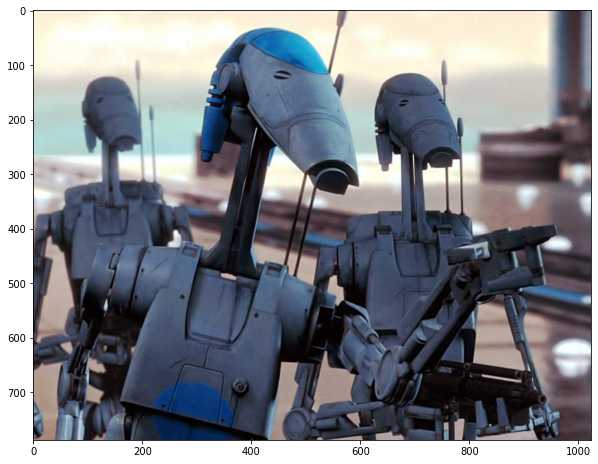

In [4]:
plt.imshow(input_image_bgr);

Again, what this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

## Converting between color spaces, merging and splitting channels

We can convert between various colorspaces in OpenCV easily.

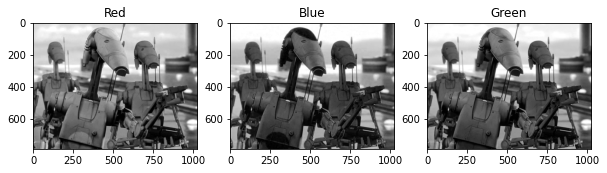

In [5]:
# split color channels out channels
b,g,r=cv2.split(input_image_bgr)

# show each of the channels
plt.subplot(1,3,1)
plt.imshow(r, cmap='gray');
plt.title('Red')

plt.subplot(1,3,2)
plt.imshow(b, cmap='gray');
plt.title('Blue')

plt.subplot(1,3,3)
plt.imshow(g, cmap='gray');
plt.title('Green');

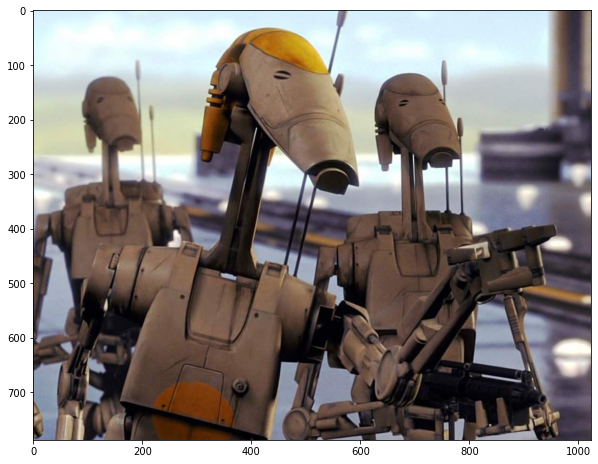

In [6]:
# now let's merge the seperate channels back together
# and get a good color RGB image
merged=cv2.merge([r,g,b])

# merge takes an array of single channel matrices
plt.imshow(merged);

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value color space. [OpenCV documents](http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html) have more information on how these color conversions are done. 

In [8]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(f'There are: {len(COLORflags)}for you to choose from when switching between different colorspaces:\n')
print('Here are the flags you can choose from:')
# print(COLORflags)
CF = COLORflags
for i in range(0,len(CF),4):
    print(f"{CF[i+0]} {CF[i+1]} {CF[i+2]} {CF[i+3]}")

There are: 296 for you to choose from when switching between different colorspaces

Here are the flags you can choose from:
COLORMAP_AUTUMN COLORMAP_BONE COLORMAP_CIVIDIS COLORMAP_COOL
COLORMAP_DEEPGREEN COLORMAP_HOT COLORMAP_HSV COLORMAP_INFERNO
COLORMAP_JET COLORMAP_MAGMA COLORMAP_OCEAN COLORMAP_PARULA
COLORMAP_PINK COLORMAP_PLASMA COLORMAP_RAINBOW COLORMAP_SPRING
COLORMAP_SUMMER COLORMAP_TURBO COLORMAP_TWILIGHT COLORMAP_TWILIGHT_SHIFTED
COLORMAP_VIRIDIS COLORMAP_WINTER COLOR_BAYER_BG2BGR COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA COLOR_BAYER_BG2BGR_VNG COLOR_BAYER_BG2GRAY COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA COLOR_BAYER_BG2RGB_EA COLOR_BAYER_BG2RGB_VNG COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA COLOR_BAYER_GB2BGR_EA COLOR_BAYER_GB2BGR_VNG COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB COLOR_BAYER_GB2RGBA COLOR_BAYER_GB2RGB_EA COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR COLOR_BAYER_GR2BGRA COLOR_BAYER_GR2BGR_EA COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY COLOR_BAYER_GR2RGB COLOR_BAYER_GR2RGBA COLO

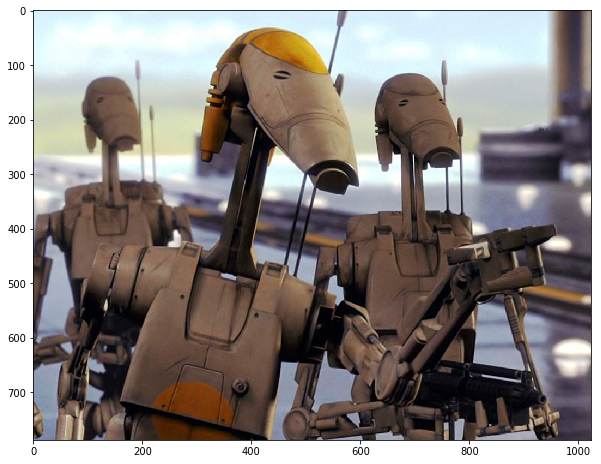

In [11]:
input_image=cv2.cvtColor(input_image_bgr, cv2.COLOR_BGR2RGB)

# yeah, this look right!
plt.imshow(input_image);

## Other Colorspaces Besides RGB/BGR

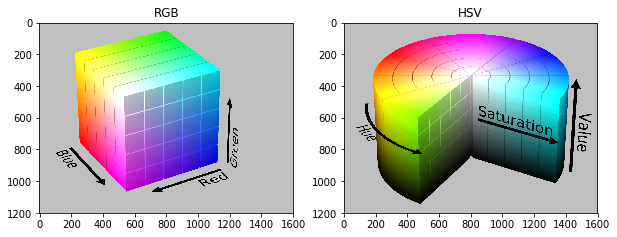

In [12]:
a = cv2.imread('rgb.png')
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.imread('hsv.png')
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

# example of subplot and nice way to show images side by side
plt.subplot(1,2,1)
plt.imshow(a)
plt.title('RGB')
plt.subplot(1,2,2)
plt.imshow(b)
plt.title('HSV');

HSL and HSV are the two most common cylindrical-coordinate representations of points in an RGB color model. The two representations rearrange the geometry of RGB in an attempt to be more intuitive and perceptually relevant than the cartesian (cube) representation. Developed in the 1970s for computer graphics applications, HSL and HSV are used today in color pickers and in image editing software.

HSV is a cylindrical geometry, with hue, as the angular dimension, starting at the red primary at 0°, passing through the green primary at 120° and the blue primary at 240°, and then wrapping back to red at 360°. In each geometry, the central vertical axis comprises the neutral, achromatic, or gray colors, ranging from black at 0, the bottom, to white at  255, the top.

| Color Space | Use |
|:------------|:----|
| RGB | RGB (Red, Green, Blue) describes what kind of light needs to be emitted to produce a given color. RGB stores individual values for red, green and blue. RGB is not a color space, it is a color model. There are many different RGB color spaces derived from this color model. |
| HSV | HSV (hue, saturation, value) uses one change to describe color, making it easier to understand and transitions between colors. It is also used in robotics (color detection) and color selection tools in image processing. |
| LAB | Perceptually uniform color space which approximates how we perceive color. One of the most important attributes of the Lab model is device independence. This means that the colors are defined independent of their nature of creation or the device they are displayed on. Used extensively in Adobe Photoshop.|

### HSV

This is commonly used in robotics because it is computationally simple (fast).

- **Hue [0-180]:** is linked to the color and it is possible to smoothly transition from one color to any other color linearly. *Note* that opencv has chosen hue to only go as far as 180 instead of 360 degrees which is a little more common
- **Saturation [0-255]:** purity/shades of the color, is how bright the color is and ranges from white to the pure color
- **Value [0-255]:** intensity, is how bright the color is and ranges from black to the pure color

### LAB

LAB and some of the other spaces are not as computationally efficient, but for certain applications are better than HSV. However, as processing power increases and performance/watt increases, this will become a moot point.

- **Lightness:** intensity
- **a:** color component ranging from Green to Magenta
- **b:** color component ranging from Blue to Yellow

Honestly, we will focus on RGB and HSV so understand those. The other hundreds of colorspaces are just an FYI. 

## Histograms 

```python
cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

1. images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
1. channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
1. mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
1. histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
1. ranges : this is our RANGE. Normally, it is [0,256].

```python
img = cv.imread('example.jpg',0) # read grayscale
hist = cv.calcHist([img],[0],None,[256],[0,256])

# or directly plot a grayscale image histogram
plt.hist(img.ravel(),256,[0,256]);
```

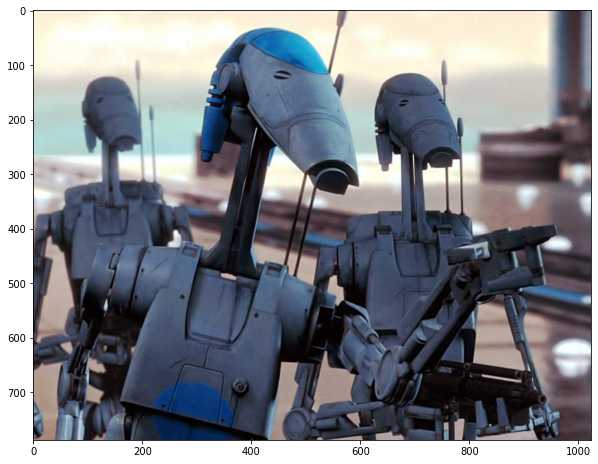

In [13]:
plt.imshow(input_image_bgr);

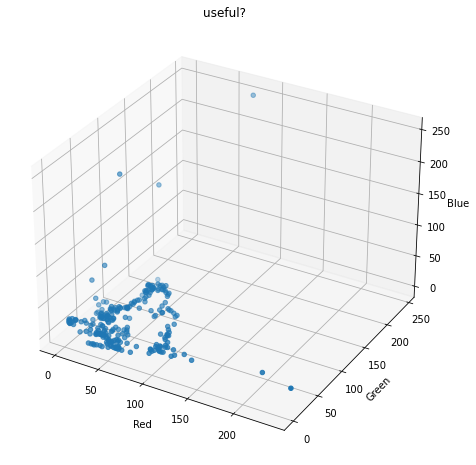

In [99]:
def scale(b):
    bb=cv2.calcHist([b],[0],None,[256],[0,256]).ravel()
    return 255*((bb-min(bb))/max(bb))

# split color channels out channels
b,g,r=cv2.split(input_image_bgr)

# print(scale(r))

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
# ax.scatter(r,g,b,cmap="plasma");
ax.scatter(
    scale(r),
    scale(g),
    scale(b),
    cmap="plasma"
)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue');
ax.set_title("useful?");

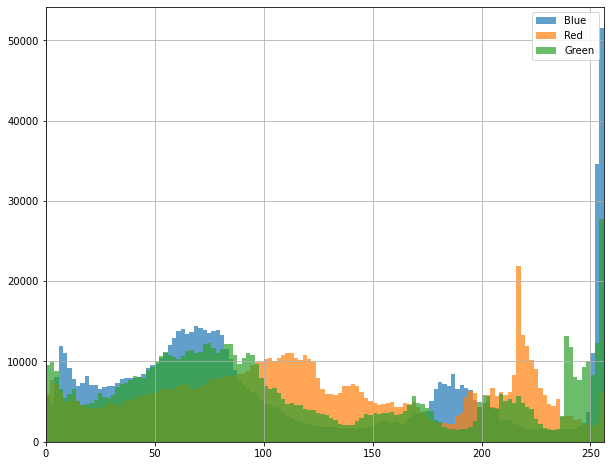

In [40]:
labels = ["Blue", "Red", "Green"]
num_bins = 128
for i, m in enumerate([b,r,g]):
    plt.hist(m.ravel(),num_bins,[0,256], alpha=0.7, label=labels[i]);
    plt.grid(True)
    plt.xlim([0,256])
plt.legend();

Text(0.5, 0, 'Value')

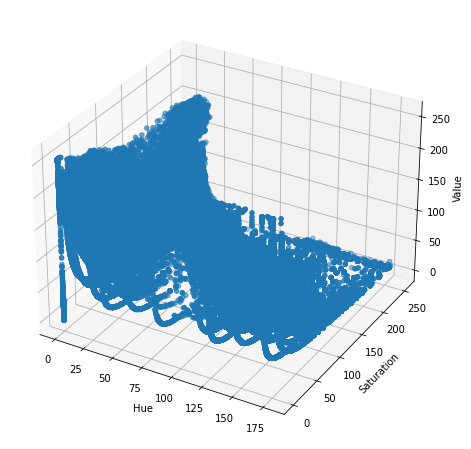

In [44]:
hsv = cv2.cvtColor(input_image_bgr, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(h,s,v);
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')

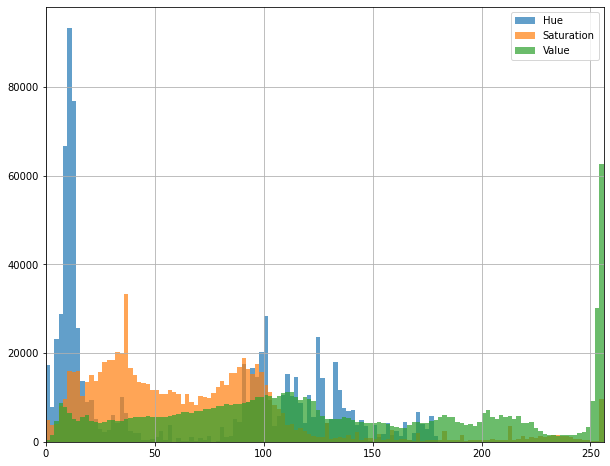

In [39]:
labels = ["Hue", "Saturation", "Value"]
num_bins = 128
for i, m in enumerate([h,s,v]):
    plt.hist(m.ravel(),num_bins,[0,256], alpha=0.7, label=labels[i]);
    plt.grid(True)
    plt.xlim([0,256])
plt.legend();

In [53]:
mm=cv2.calcHist([h],[0],None,[256],[0,256]).ravel()
mm.shape

(256,)

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimized for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [13]:
pixel = input_image[100,100]
print(pixel)

[228 246 250]


In [14]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. You can do things like this:

![](numpy-indexing.png)

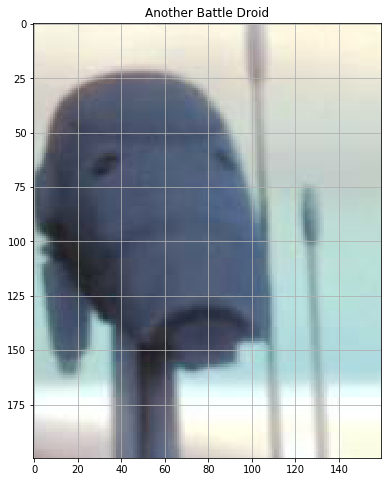

In [23]:
freshim2 = cv2.imread("droids.jpg")
crop = freshim2[100:300, 90:250] 
plt.imshow(crop);
plt.title('Another Battle Droid');
plt.grid(True);  # why did I put the grid lines on ... why not?

The key thing to note here is that the slicing works like
```
image[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
image[y:y+height, x:x+width, channel]
```
where channel represents the color you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else like gray scale or HSV.

## Getting and Setting Regions of Interest (ROI) in an Image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to access a subsection of your image to work on. In a lot of the OpenCV documentation, this is referred to as Region of Interest (ROI).

    input_image[y0:y1, x0:x1]

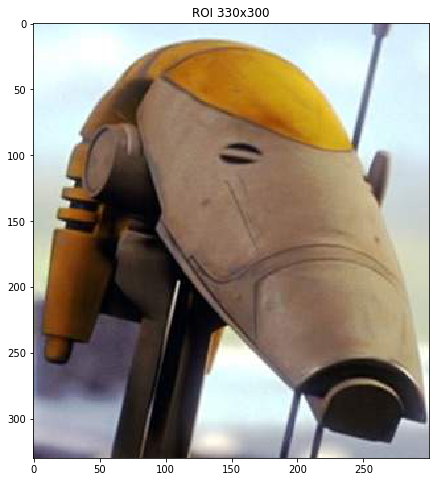

In [17]:
# this is essentially cropping an image
roi = input_image[20:350, 300:600]
plt.imshow(roi);
plt.title('ROI {}x{}'.format(roi.shape[0], roi.shape[1]));

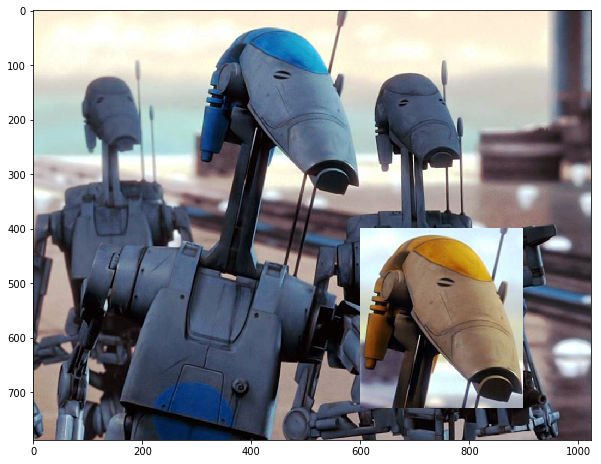

In [18]:
# grab a new copy
fresh_image=cv2.imread('droids.jpg') # note, we won't fix the color for this one

# paste the cropped/roi image over the fresh copy
# basically, you are setting a sub matrix of data equal to the roi
fresh_image[400:400+roi.shape[0], 600:600+roi.shape[1]]=roi
plt.imshow(fresh_image);